
# CÓDIGO COM SOLUÇÃO:
## ANÁLISE PREDITIVA E SIMULAÇÃO IoT



# Importação e leitura dos dados:




In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Carregar o dataset (suba o arquivo Renewable_Energy_Data.csv antes)
df = pd.read_csv("Renewable_Energy_Data.csv")

df.head()


,Region,Energy_Source,Temperature_C,Wind_Speed_m_s,Solar_Radiation_kWh_m2,Rainfall_mm,Season,Efficiency_Ratio,Lagged_Production_MWh,Combined_Weather_Index,Energy_Class
0,North,Hydro,13.820937,14.362462,8.834648,3.350827,Winter,125.449109,1419.514155,1.565158,Medium
1,North,Solar,36.972782,19.110474,4.483191,48.767157,Winter,16.325089,4769.329958,0.621331,Low
2,East,Hydro,33.972875,0.364652,5.104325,40.848695,Winter,155.637061,1005.077719,0.156378,High
3,South,Solar,-2.965160,3.915560,6.265925,42.627371,Spring,675.516566,6294.250931,-5.180996,High
4,North,Wind,-3.813486,0.151257,9.263826,46.898262,Spring,626.048277,5550.263638,-3.346412,Medium



# Peparação dos dados e treinamento do modelo:


In [16]:
# Selecionar variáveis climáticas como preditoras
X = df[["Temperature_C", "Wind_Speed_m_s", "Solar_Radiation_kWh_m2", "Rainfall_mm"]]
y = df["Efficiency_Ratio"]

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!



# Avaliação do modelo e visualização:


 Avaliação do Modelo Preditivo:
R²: 0.154
Erro Absoluto Médio (MAE): 158.56


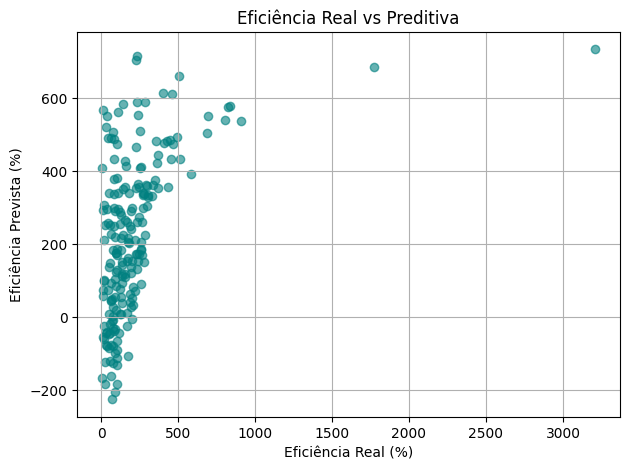

In [17]:
# Fazer previsões
y_pred = modelo.predict(X_test)

# Métricas de desempenho
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(" Avaliação do Modelo Preditivo:")
print(f"R²: {r2:.3f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")

# Gráfico de comparação
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.title("Eficiência Real vs Preditiva")
plt.xlabel("Eficiência Real (%)")
plt.ylabel("Eficiência Prevista (%)")
plt.grid(True)
plt.show()



# Previsão com valores simulados


In [19]:
novo_dado = pd.DataFrame({
    "Temperature_C": [30],
    "Wind_Speed_m_s": [5],
    "Solar_Radiation_kWh_m2": [7],
    "Rainfall_mm": [15]
})

ef_pred = modelo.predict(novo_dado)[0]
print(f" Eficiência prevista para condições simuladas: {ef_pred:.2f}%")


 Eficiência prevista para condições simuladas: 142.98%



#Simulação em IoT:


In [20]:
def sistema_iot(temperatura, vento, radiacao):
    acoes = []
    if temperatura > 30:
        acoes.append("Ativar sistema de resfriamento dos painéis solares.")
    elif temperatura < 5:
        acoes.append("Ativar modo de aquecimento ou redirecionar energia térmica.")

    if vento < 3:
        acoes.append("Aumentar rotação mínima da turbina eólica.")
    elif vento > 15:
        acoes.append("Reduzir rotação da turbina para evitar sobrecarga.")

    if radiacao < 3:
        acoes.append("Priorizar energia eólica/hídrica devido à baixa radiação.")
    elif radiacao > 8:
        acoes.append("Reduzir exposição direta dos painéis para evitar superaquecimento.")
    return acoes

# Executar simulação IoT
acoes_recomendadas = sistema_iot(31, 1, 9)

print("Ações recomendadas pelo sistema IoT:")
for acao in acoes_recomendadas:
    print("-", acao)


Ações recomendadas pelo sistema IoT:
- Ativar sistema de resfriamento dos painéis solares.
- Aumentar rotação mínima da turbina eólica.
- Reduzir exposição direta dos painéis para evitar superaquecimento.


# Impacto de cada variável na eficiência:

Impacto das variáveis na eficiência:


,Variável,Impacto_na_Eficiência
3,Rainfall_mm,-0.632278
0,Temperature_C,-12.352012
1,Wind_Speed_m_s,-20.152263
2,Solar_Radiation_kWh_m2,-23.328101


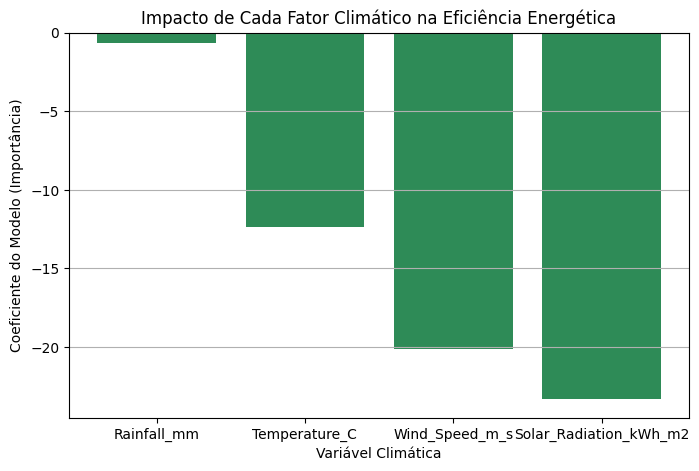

In [24]:
# Obter os coeficientes do modelo treinado
coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Impacto_na_Eficiência": modelo.coef_
}).sort_values(by="Impacto_na_Eficiência", ascending=False)

# Exibir tabela
print("Impacto das variáveis na eficiência:")
display(coeficientes)

# Criar gráfico
plt.figure(figsize=(8,5))
plt.bar(coeficientes["Variável"], coeficientes["Impacto_na_Eficiência"], color="seagreen")
plt.title("Impacto de Cada Fator Climático na Eficiência Energética")
plt.xlabel("Variável Climática")
plt.ylabel("Coeficiente do Modelo (Importância)")
plt.grid(axis="y")
plt.show()


# Conclusão

In [21]:
print("Conclusão:")
print("O modelo preditivo ajuda a estimar a eficiência conforme o clima.")
print("O sistema IoT simulado sugere ajustes automáticos para manter a eficiência ideal.")
print("Essa combinação mostra como análise de dados e automação podem otimizar o uso de energias renováveis.")


Conclusão:
O modelo preditivo ajuda a estimar a eficiência conforme o clima.
O sistema IoT simulado sugere ajustes automáticos para manter a eficiência ideal.
Essa combinação mostra como análise de dados e automação podem otimizar o uso de energias renováveis.
